<a href="https://colab.research.google.com/github/nandakhairunnisa/202055202025-AnandaK/blob/master/klasifikasi-ras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download anandakhairunnisa/klasifikasi-ras

In [4]:
!mkdir dataset

In [6]:
!unzip /content/klasifikasi-ras.zip -d /content/dataset

Archive:  /content/klasifikasi-ras.zip
  inflating: /content/dataset/ras/test/africa/africa (1).jpg  
  inflating: /content/dataset/ras/test/africa/africa (10).jpg  
  inflating: /content/dataset/ras/test/africa/africa (11).jpg  
  inflating: /content/dataset/ras/test/africa/africa (12).jpg  
  inflating: /content/dataset/ras/test/africa/africa (13).jpg  
  inflating: /content/dataset/ras/test/africa/africa (14).jpg  
  inflating: /content/dataset/ras/test/africa/africa (15).jpg  
  inflating: /content/dataset/ras/test/africa/africa (16).jpg  
  inflating: /content/dataset/ras/test/africa/africa (17).jpg  
  inflating: /content/dataset/ras/test/africa/africa (18).jpg  
  inflating: /content/dataset/ras/test/africa/africa (19).jpg  
  inflating: /content/dataset/ras/test/africa/africa (2).jpg  
  inflating: /content/dataset/ras/test/africa/africa (20).jpg  
  inflating: /content/dataset/ras/test/africa/africa (21).jpg  
  inflating: /content/dataset/ras/test/africa/africa (22).jpg  
  i

In [7]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [8]:
dataset_path = Path(r'/content/dataset')
file_path = list(dataset_path.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))

In [9]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)
df = pd.concat([file_path, labels], axis=1)
df.columns = ['image', 'label']
df.head()

,image,label
0,/content/dataset/ras/test/asia/asia (15).jpg,asia
1,/content/dataset/ras/test/asia/asia (11).jpg,asia
2,/content/dataset/ras/test/asia/asia (8).jpg,asia
3,/content/dataset/ras/test/asia/asia (3).jpg,asia
4,/content/dataset/ras/test/asia/asia (14).jpg,asia


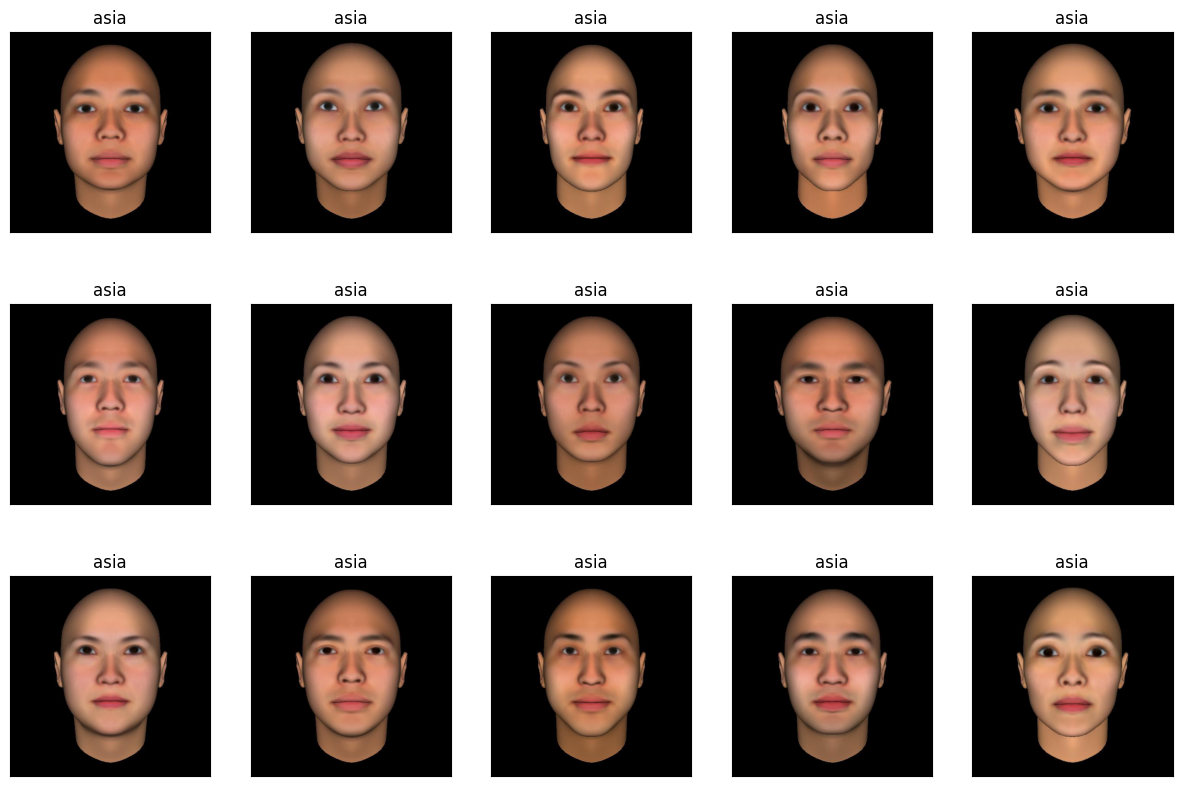

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])
    
plt.show()

In [11]:
df.label.value_counts()

asia      150
africa    150
eropa     150
Name: label, dtype: int64

In [12]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()

asia      150
africa    150
eropa     150
Name: label, dtype: int64

In [13]:
x_train, x_test = train_test_split(df, test_size=0.3,random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

In [14]:
print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)

Shape of training data (252, 2)
Shape of test data (135, 2)
Shape of validation data (63, 2)


In [15]:
image_data_generator = ImageDataGenerator(rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical', shuffle=False)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(200,200), color_mode='rgb', class_mode='categorical',shuffle=False)

Found 252 validated image filenames belonging to 3 classes.
Found 135 validated image filenames belonging to 3 classes.
Found 63 validated image filenames belonging to 3 classes.


In [16]:
input_shape = (200, 200, 3)

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

In [18]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)
history = model.fit(train, batch_size= 100, validation_data=val, epochs=50, callbacks=callback)

Epoch 1/50
8/8 [==============================] - 18s 669ms/step - loss: 0.9872 - accuracy: 0.4206 - val_loss: 0.7578 - val_accuracy: 0.6349
Epoch 2/50
8/8 [==============================] - 4s 519ms/step - loss: 0.7044 - accuracy: 0.6905 - val_loss: 0.6939 - val_accuracy: 0.6032
Epoch 3/50
8/8 [==============================] - 4s 501ms/step - loss: 0.5912 - accuracy: 0.6548 - val_loss: 0.5509 - val_accuracy: 0.6190
Epoch 4/50
8/8 [==============================] - 4s 541ms/step - loss: 0.5410 - accuracy: 0.6865 - val_loss: 0.5216 - val_accuracy: 0.6508
Epoch 5/50
8/8 [==============================] - 4s 494ms/step - loss: 0.4817 - accuracy: 0.7460 - val_loss: 0.5043 - val_accuracy: 0.7619
Epoch 6/50
8/8 [==============================] - 4s 442ms/step - loss: 0.4637 - accuracy: 0.7500 - val_loss: 0.5044 - val_accuracy: 0.6984
Epoch 7/50
8/8 [==============================] - 4s 442ms/step - loss: 0.4252 - accuracy: 0.7976 - val_loss: 0.5038 - val_accuracy: 0.7143
Epoch 8/50
8/8 [===

In [19]:
model.save('model-1.h5')

In [20]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

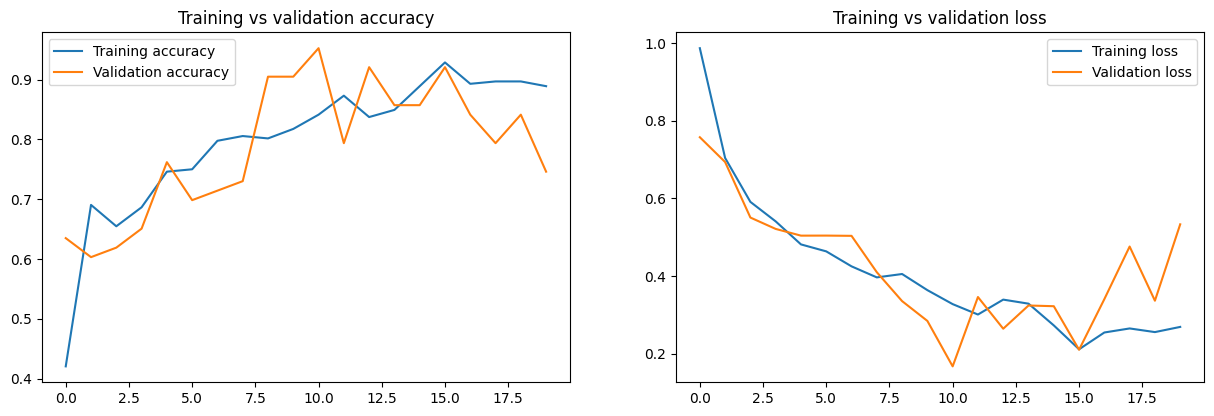

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")
plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")
plt.show()

In [22]:
pred = model.predict(test)

5/5 [==============================] - 2s 353ms/step


In [23]:
pred = np.argmax(pred, axis=1)

In [24]:
labels = train.class_indices

In [25]:
labels

{'africa': 0, 'asia': 1, 'eropa': 2}

In [26]:
labels = dict((v,k) for k, v in labels.items())

In [27]:
labels

{0: 'africa', 1: 'asia', 2: 'eropa'}

In [28]:
y_pred = [labels[k] for k in pred]

In [29]:
print(classification_report(x_test.label, y_pred))

              precision    recall  f1-score   support

      africa       0.96      0.61      0.75        36
        asia       1.00      1.00      1.00        51
       eropa       0.77      0.98      0.86        48

    accuracy                           0.89       135
   macro avg       0.91      0.86      0.87       135
weighted avg       0.91      0.89      0.88       135



In [30]:
print(confusion_matrix(x_test.label, y_pred))

[[22  0 14]
 [ 0 51  0]
 [ 1  0 47]]


In [31]:
test_accuracy = model.evaluate(test)[1]

5/5 [==============================] - 2s 283ms/step - loss: 0.2831 - accuracy: 0.8963
